In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# House Price Prediction

In [18]:
## data
df=pd.read_csv("data/train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]


---

## Ames Housing Dataset: Feature Descriptions

### Target Variable

* **SalePrice**: The property's sale price in dollars (target variable).

### General Property Information

* **MSSubClass**: The building class.
* **MSZoning**: The general zoning classification.
* **LotFrontage**: Linear feet of street connected to property.
* **LotArea**: Lot size in square feet.
* **Street**: Type of road access.
* **Alley**: Type of alley access.
* **LotShape**: General shape of property.
* **LandContour**: Flatness of the property.
* **Utilities**: Type of utilities available.
* **LotConfig**: Lot configuration.
* **LandSlope**: Slope of property.

### Location Features

* **Neighborhood**: Physical locations within Ames city limits.
* **Condition1**: Proximity to main road or railroad.
* **Condition2**: Proximity to main road or railroad (if a second is present).

### Building Characteristics

* **BldgType**: Type of dwelling.
* **HouseStyle**: Style of dwelling.
* **OverallQual**: Overall material and finish quality.
* **OverallCond**: Overall condition rating.
* **YearBuilt**: Original construction date.
* **YearRemodAdd**: Remodel date.

### Exterior Features

* **RoofStyle**: Type of roof.
* **RoofMatl**: Roof material.
* **Exterior1st**: Exterior covering on house.
* **Exterior2nd**: Exterior covering on house (if more than one material).
* **MasVnrType**: Masonry veneer type.
* **MasVnrArea**: Masonry veneer area in square feet.

### Basement Features

* **Foundation**: Type of foundation.
* **BsmtQual**: Height of the basement.
* **BsmtCond**: General condition of the basement.
* **BsmtExposure**: Walkout or garden level basement walls.
* **BsmtFinType1**: Quality of basement finished area.
* **BsmtFinSF1**: Type 1 finished square feet.
* **BsmtFinType2**: Quality of second finished area (if present).
* **BsmtFinSF2**: Type 2 finished square feet.
* **BsmtUnfSF**: Unfinished square feet of basement area.
* **TotalBsmtSF**: Total square feet of basement area.

### Heating and Cooling

* **Heating**: Type of heating.
* **HeatingQC**: Heating quality and condition.
* **CentralAir**: Central air conditioning (Yes/No).
* **Electrical**: Electrical system.

### Living Area

* **1stFlrSF**: First floor square feet.
* **2ndFlrSF**: Second floor square feet.
* **LowQualFinSF**: Low quality finished square feet (all floors).
* **GrLivArea**: Above grade (ground) living area square feet.

### Bathrooms

* **BsmtFullBath**: Basement full bathrooms.
* **BsmtHalfBath**: Basement half bathrooms.
* **FullBath**: Full bathrooms above grade.
* **HalfBath**: Half baths above grade.

### Rooms and Features

* **Bedroom**: Number of bedrooms above basement level.
* **Kitchen**: Number of kitchens.
* **KitchenQual**: Kitchen quality.
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms).
* **Functional**: Home functionality rating.

### Fireplace

* **Fireplaces**: Number of fireplaces.
* **FireplaceQu**: Fireplace quality.

### Garage Features

* **GarageType**: Garage location.
* **GarageYrBlt**: Year garage was built.
* **GarageFinish**: Interior finish of the garage.
* **GarageCars**: Size of garage in car capacity.
* **GarageArea**: Size of garage in square feet.
* **GarageQual**: Garage quality.
* **GarageCond**: Garage condition.

### Exterior Add-ons

* **PavedDrive**: Paved driveway.
* **WoodDeckSF**: Wood deck area in square feet.
* **OpenPorchSF**: Open porch area in square feet.
* **EnclosedPorch**: Enclosed porch area in square feet.
* **3SsnPorch**: Three season porch area in square feet.
* **ScreenPorch**: Screen porch area in square feet.
* **PoolArea**: Pool area in square feet.
* **PoolQC**: Pool quality.
* **Fence**: Fence quality.
* **MiscFeature**: Miscellaneous feature not covered in other categories.
* **MiscVal**: Dollar value of miscellaneous feature.

### Sale Information

* **MoSold**: Month sold.
* **YrSold**: Year sold.
* **SaleType**: Type of sale.
* **SaleCondition**: Condition of sale.

---



In [19]:
df = df.set_index('Id')


In [20]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [22]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [30]:
df1=df.copy()
            

In [24]:
df1

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [31]:
for label,content in df1.items():
    if pd.api.types.is_object_dtype:
        if label=="LotArea":
            
            df1[label + "missing"]=pd.isnull(content).astype(int)
        df1[label]=pd.Categorical(content).codes+1

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   MSSubClass      1460 non-null   int8 
 1   MSZoning        1460 non-null   int8 
 2   LotFrontage     1460 non-null   int8 
 3   LotArea         1460 non-null   int16
 4   Street          1460 non-null   int8 
 5   Alley           1460 non-null   int8 
 6   LotShape        1460 non-null   int8 
 7   LandContour     1460 non-null   int8 
 8   Utilities       1460 non-null   int8 
 9   LotConfig       1460 non-null   int8 
 10  LandSlope       1460 non-null   int8 
 11  Neighborhood    1460 non-null   int8 
 12  Condition1      1460 non-null   int8 
 13  Condition2      1460 non-null   int8 
 14  BldgType        1460 non-null   int8 
 15  HouseStyle      1460 non-null   int8 
 16  OverallQual     1460 non-null   int8 
 17  OverallCond     1460 non-null   int8 
 18  YearBuilt       1460 non-null   i

In [33]:
df1.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
                 ..
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
LotAreamissing    0
Length: 81, dtype: int64

In [34]:
df1.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                        
1            6         4           37      328       2      0         4   
2            1         4           52      499       2      0         4   
3            6         4           40      703       2      0         1   
4            7         4           32      490       2      0         1   
5            6         4           56      926       2      0         1   

    LandContour  Utilities  LotConfig  ...  PoolQC  Fence  MiscFeature  \
Id                                     ...                               
1             4          1          5  ...       0      0            0   
2             4          1          3  ...       0      0            0   
3             4          1          5  ...       0      0            0   
4             4          1          1  ...       0      0            0   
5             4          1          3  ...       0      0            0   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  \
Id                                                                
1         1       2       3         9              5        413   
2         1       5       2         9              5        340   
3         1       9       3         9              5        443   
4         1       2       1         9              1        195   
5         1      12       3         9              5        495   

    LotAreamissing  
Id                  
1                0  
2                0  
3                0  
4                0  
5                0  

[5 rows x 81 columns]

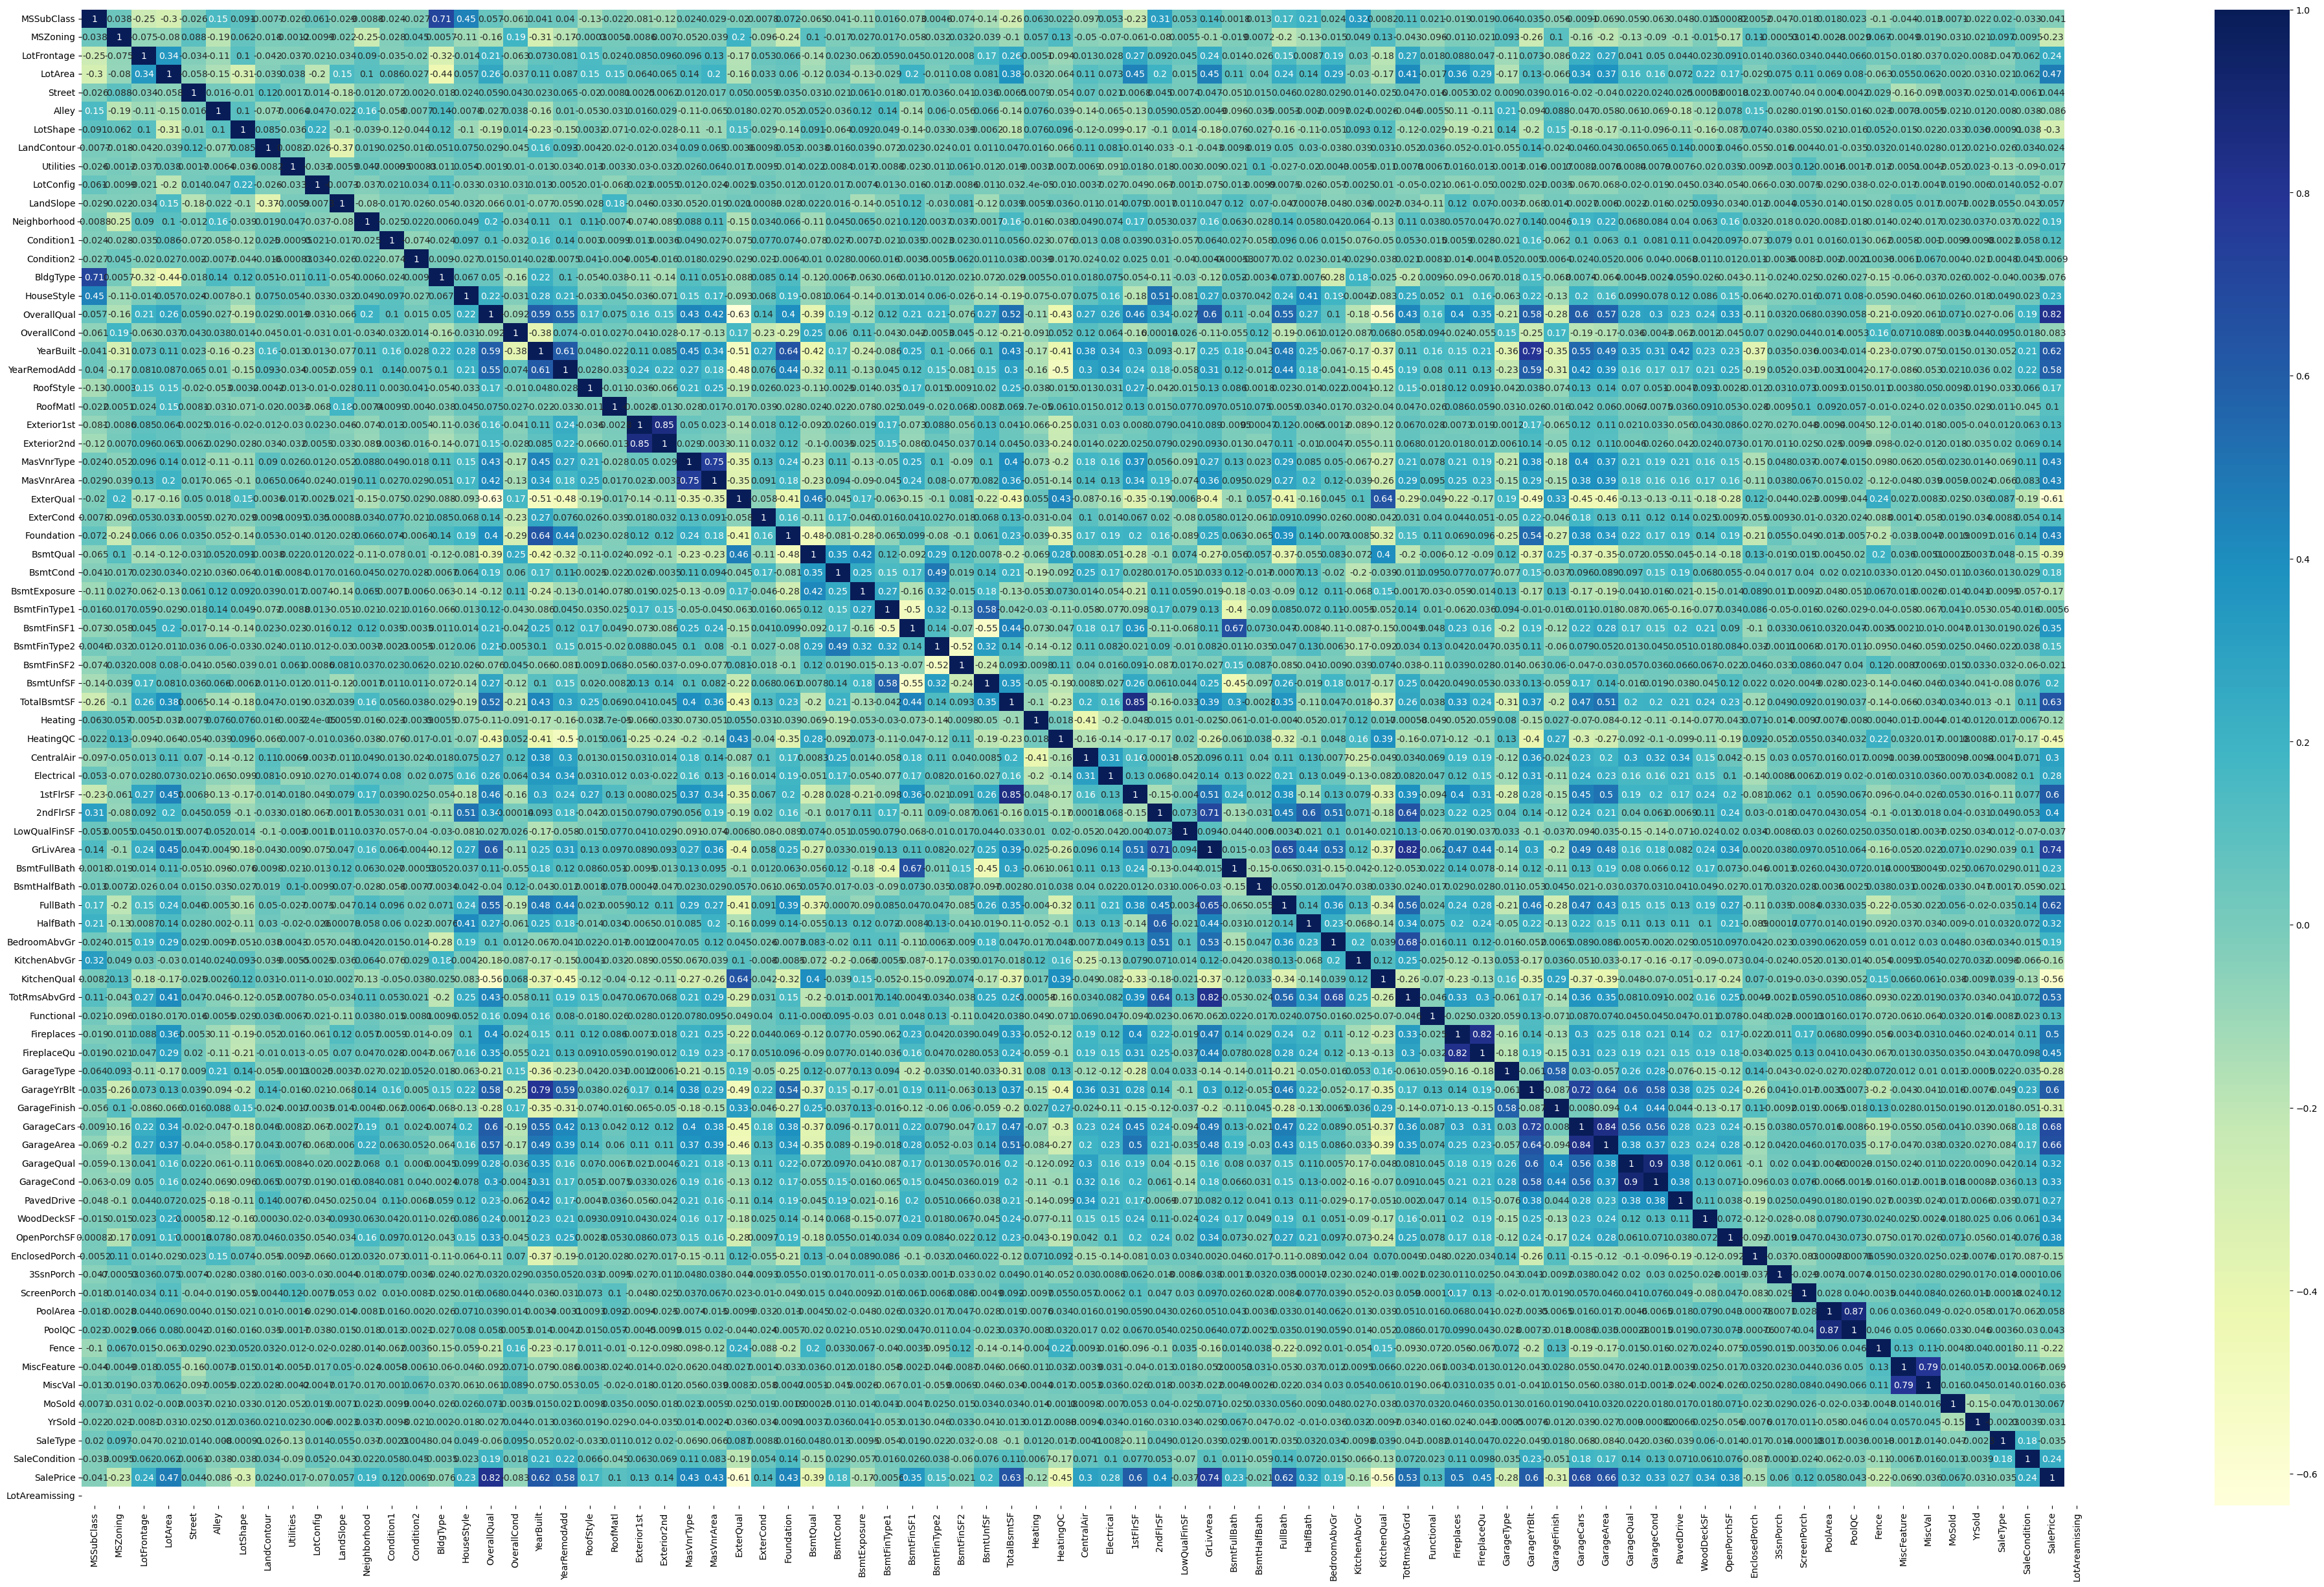

In [44]:
plt.figure(figsize=(50,30))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")
plt.show()

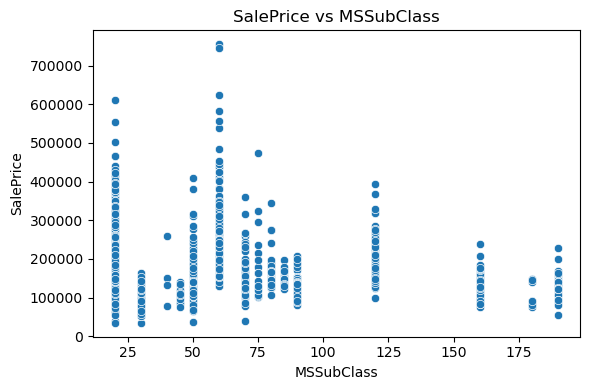

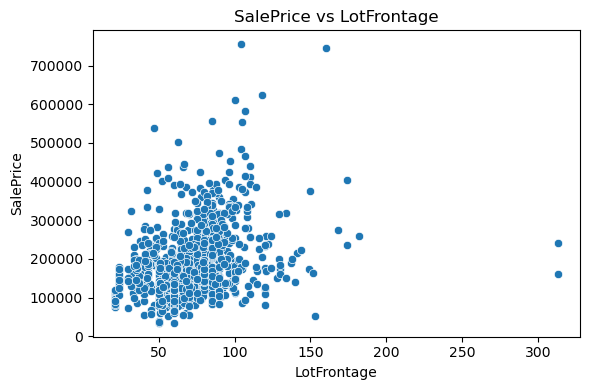

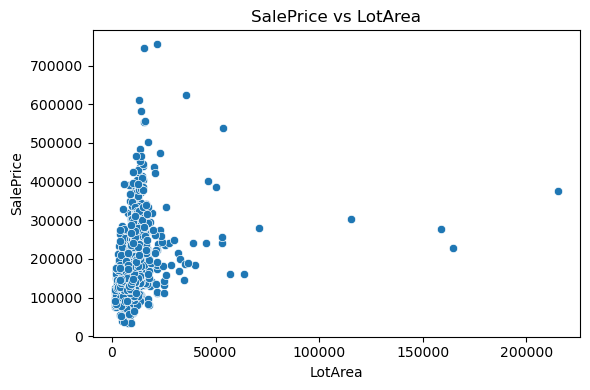

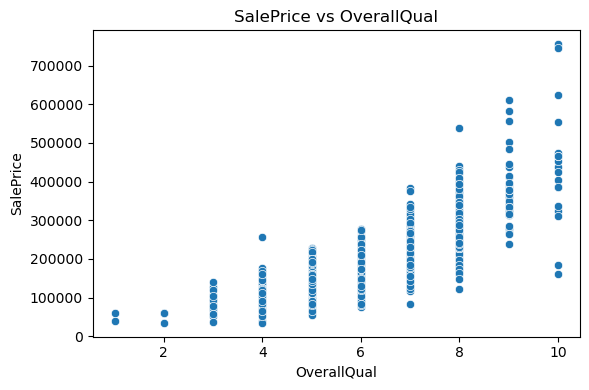

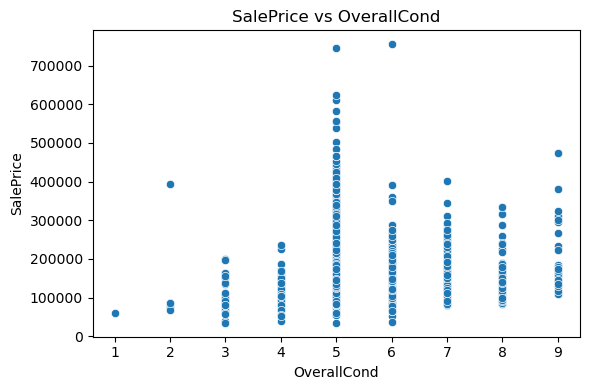

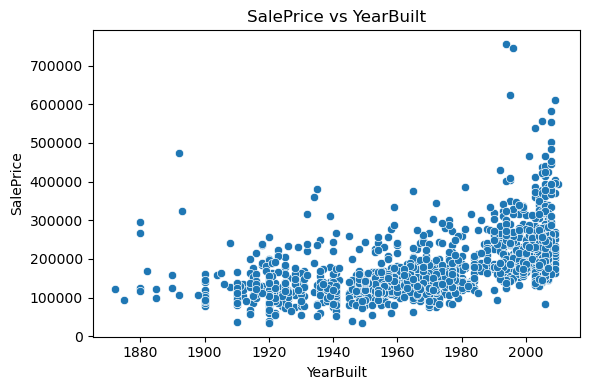

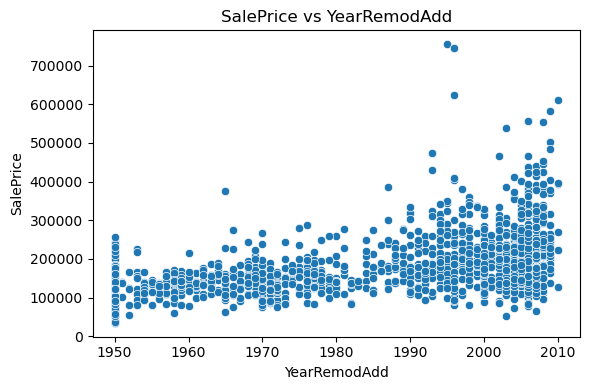

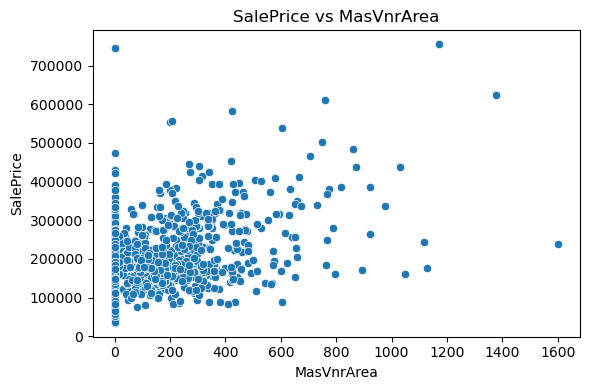

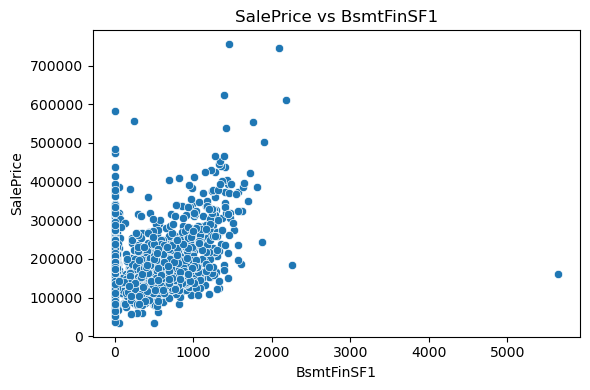

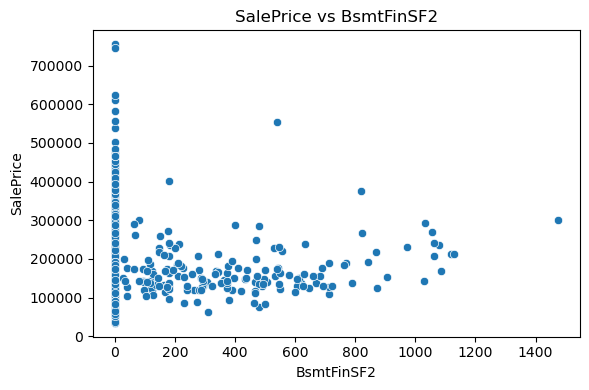

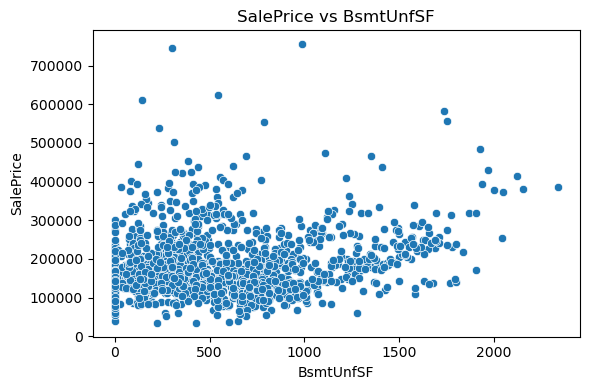

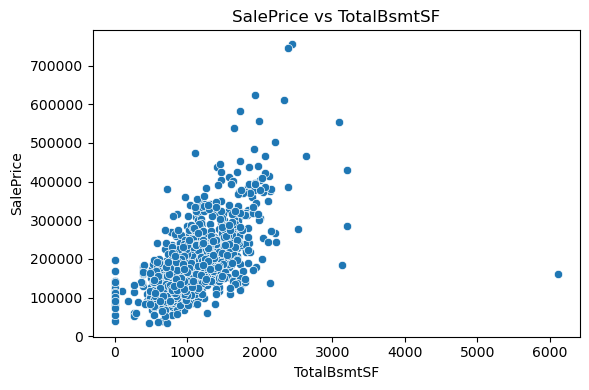

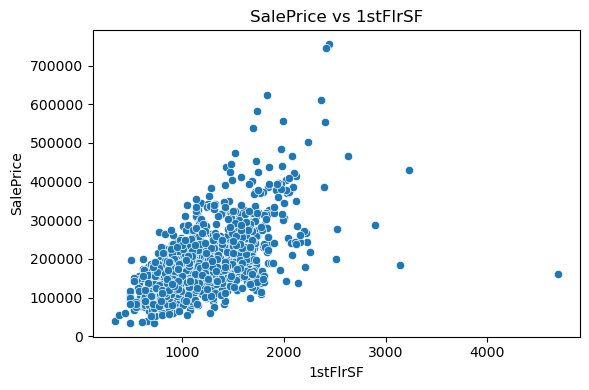

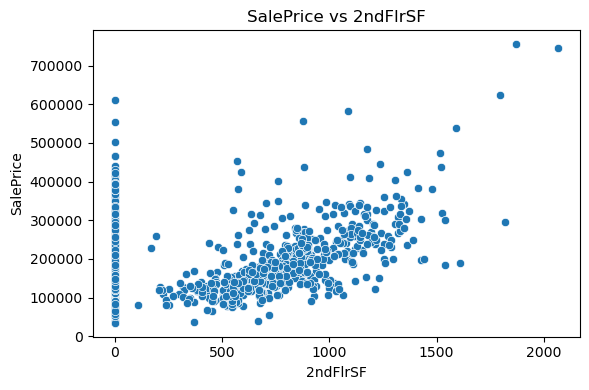

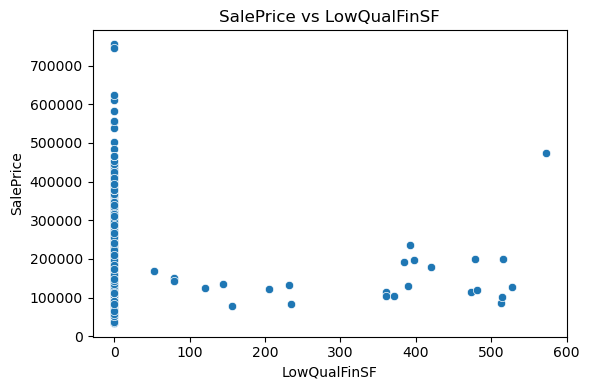

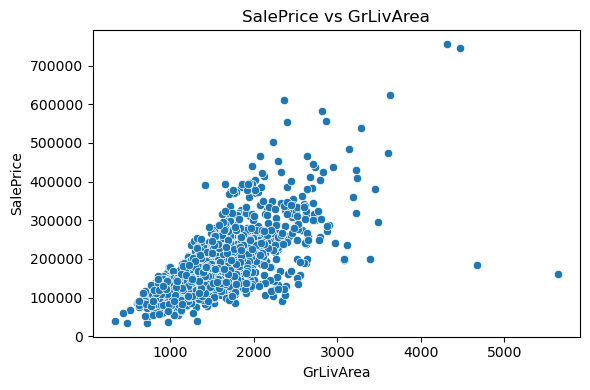

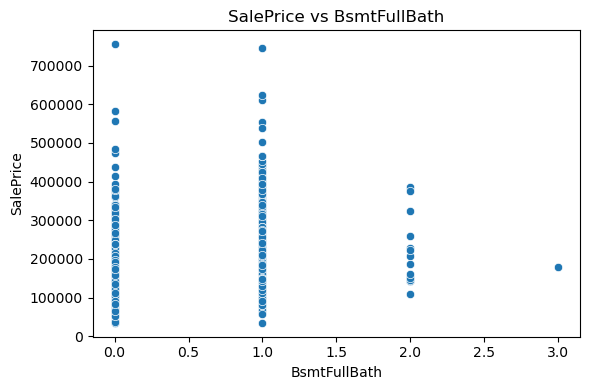

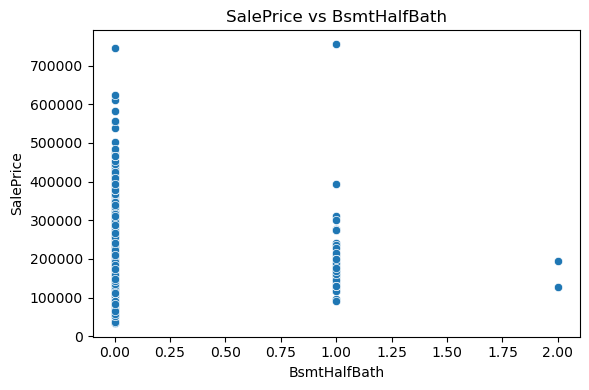

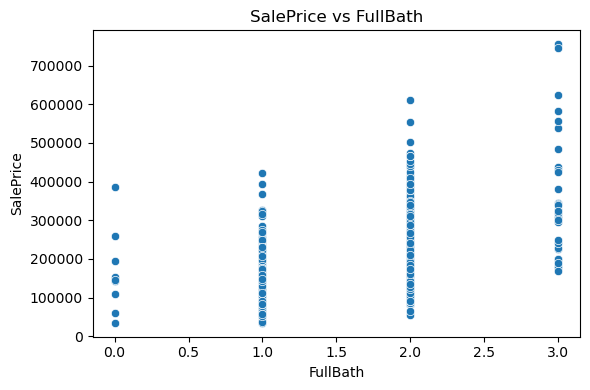

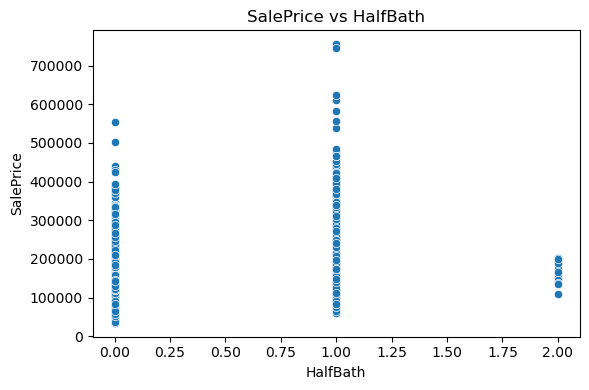

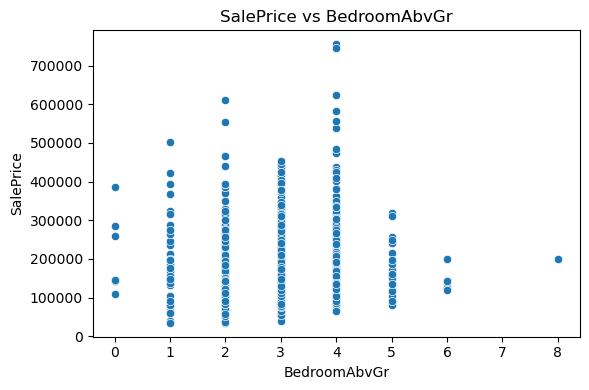

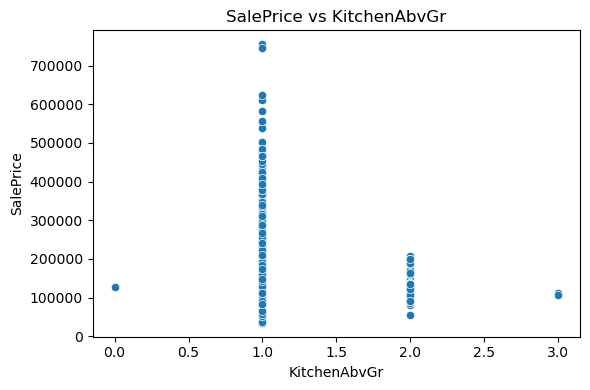

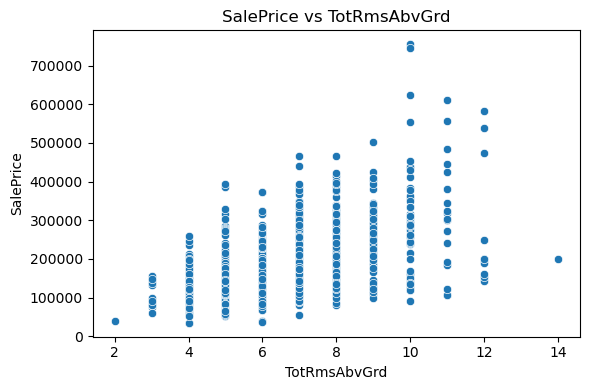

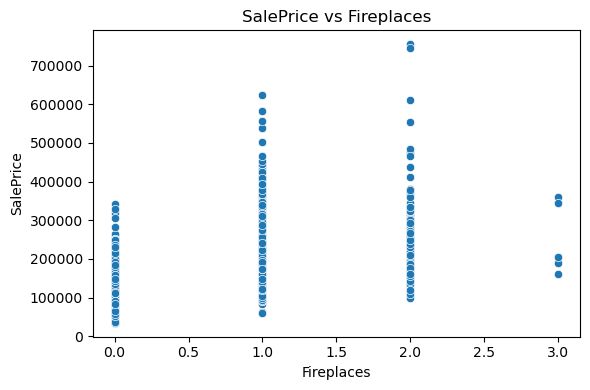

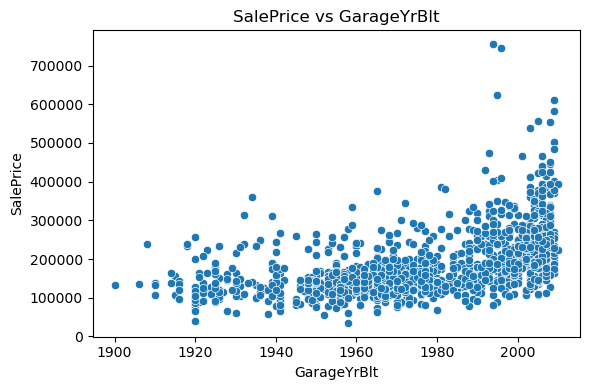

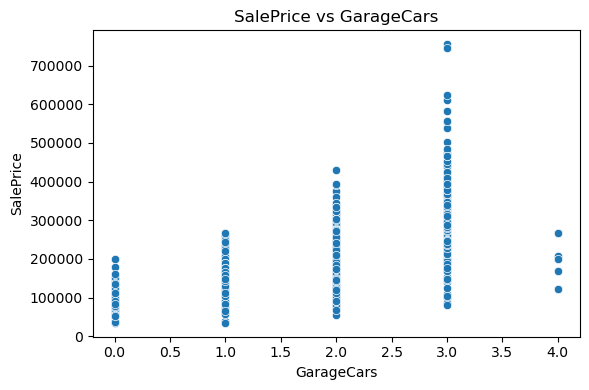

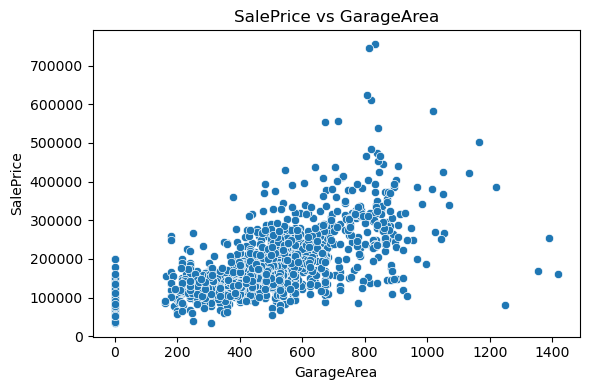

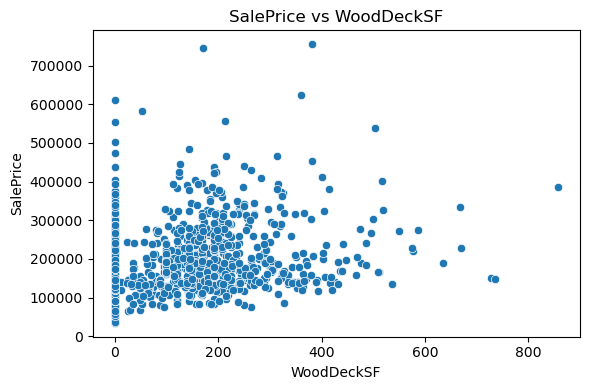

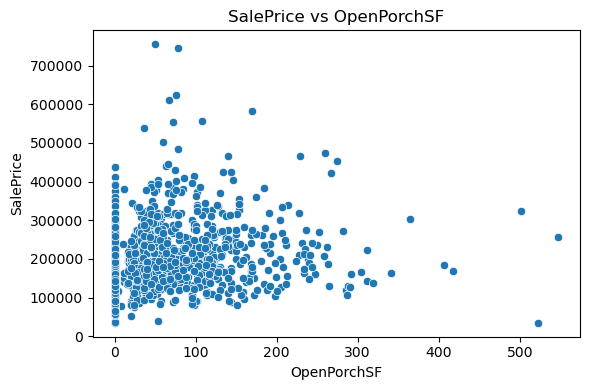

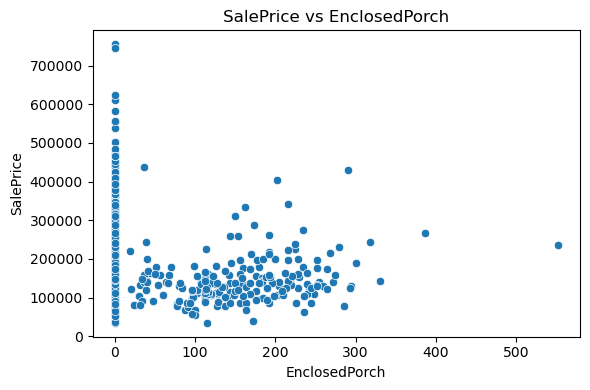

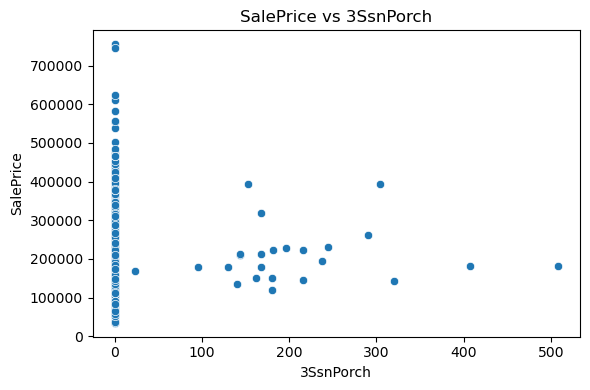

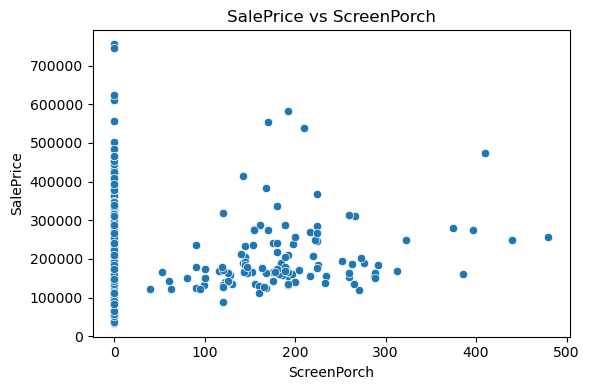

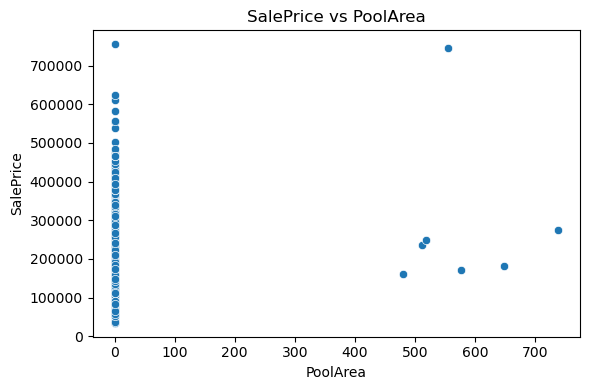

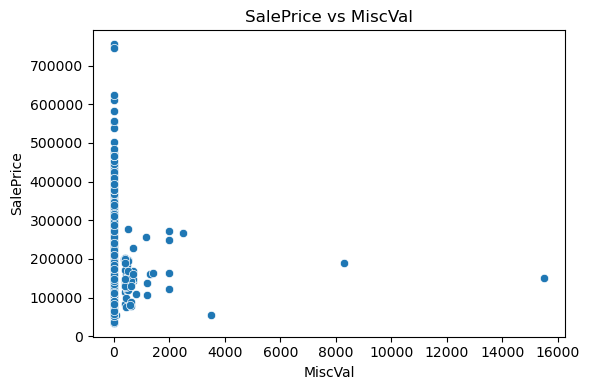

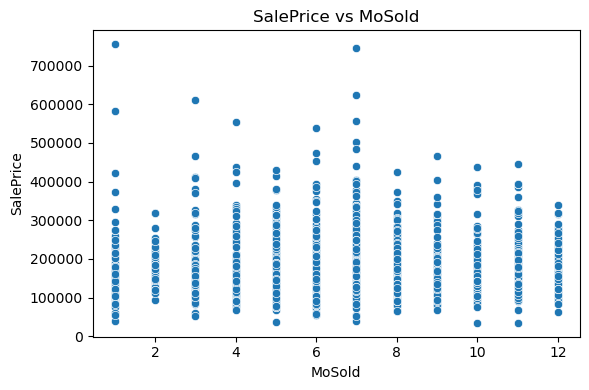

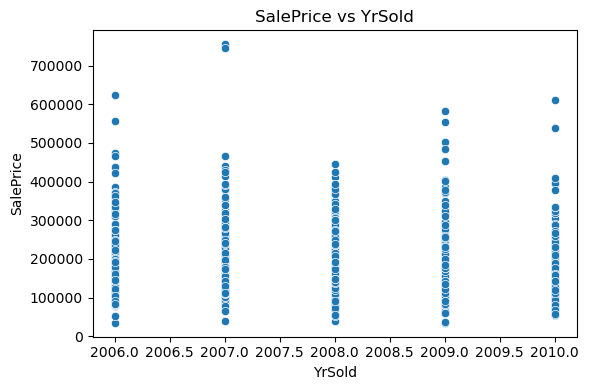

In [60]:
for col in df.keys():
    if col=="SalePrice":
        continue
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df["SalePrice"])
        plt.plot()
        plt.title(f"SalePrice vs {col}")
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        plt.tight_layout()
    plt.show()

In [59]:
df1.corr()["SalePrice"].sort_values(ascending=False)
    

SalePrice         1.000000
OverallQual       0.816896
GrLivArea         0.736876
GarageCars        0.681007
GarageArea        0.663627
                    ...   
BsmtQual         -0.391378
HeatingQC        -0.449409
KitchenQual      -0.555703
ExterQual        -0.607732
LotAreamissing         NaN
Name: SalePrice, Length: 81, dtype: float64

In [67]:
## modelling
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=df1.drop("SalePrice",axis=1)
y=df1["SalePrice"]
Xtrain,Xvalid,ytrain,yvalid=train_test_split(X,y,test_size=0.2)


In [64]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(Xtrain,ytrain)

0.9841274855836701

In [100]:
import numpy as np
from sklearn.metrics import mean_squared_error

def evaluate_log_rmse(model):
    y_pred = model.predict(Xvalid)
    y_pred = np.maximum(y_pred, 1)  # Avoid log(0) or negatives
    rmse = np.sqrt(mean_squared_error(np.log(yvalid), np.log(y_pred)))
    return {'log_rmse': rmse}


In [72]:
evaluate_log_rmse(model)

{'log_rmse': np.float64(0.4449316290568045)}

In [73]:
df2=df.copy()

In [101]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor


np.random.seed(42)
X=df.drop("SalePrice",axis=1)
y=df["SalePrice"]
Xtrain,Xvalid,ytrain,yvalid=train_test_split(X,y,test_size=0.2)
cat_feat=[]
num_feat=[]
for label ,content in df.items():
    if label=="SalePrice":
        continue
    if pd.api.types.is_object_dtype(content):
        cat_feat.append(label)

    else:
        num_feat.append(label)

cat_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])
num_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="median"))])
preprocessor=ColumnTransformer(transformers=[("cat",cat_trans,cat_feat),("num",num_trans,num_feat)])
Lmodel=Pipeline([("preprocessor",preprocessor),("model",LinearRegression())])
Xmodel=Pipeline([("preprocessor",preprocessor),("model",XGBRegressor())])
LGmodel=Pipeline([("preprocessor",preprocessor),("model",RandomForestRegressor())])


Lmodel.fit(Xtrain,ytrain)
Xmodel.fit(Xtrain,ytrain)
LGmodel.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Cond...
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('model', RandomForestRegressor())])

In [79]:
evaluate_log_rmse(Lmodel)

{'log_rmse': np.float64(0.1642058798836252)}

In [83]:
evaluate_log_rmse(Xmodel)

{'log_rmse': np.float64(0.1428558314010997)}

In [103]:
# param_grid = {
#     "model__n_estimators": [100, 200],
#     "model__max_depth": [3, 5, 7],
#     "model__learning_rate": [0.05, 0.1],
#     "model__subsample": [0.8, 1.0]
# }
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.9, 1.0],
    "model__colsample_bytree": [0.7, 0.9, 1.0]
}


In [109]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(Xmodel,param_grid,n_jobs=-1,cv=5,verbose=True,scoring='neg_root_mean_squared_error')
grid_model.fit(Xtrain,ytrain)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neig...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.7, 0.9, 1.0],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.7, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [111]:
evaluate_log_rmse(grid_model)

{'log_rmse': np.float64(0.13188965799523855)}

In [107]:
evaluate_log_rmse(LGmodel)


{'log_rmse': np.float64(0.15099610700785293)}

AttributeError: 'Pipeline' object has no attribute 'features_importances_'

In [118]:
bm=grid_model.best_estimator_
model1=bm["model"]
importances=model1.feature_importances_

In [123]:
preprocessor = bm.named_steps["preprocessor"]
feature_names = preprocessor.get_feature_names_out()

import pandas as pd
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

print(feat_imp.head(30))


                       Feature  Importance
150      cat__BsmtQual_missing         0.0
111   cat__Exterior2nd_AsbShng         0.0
194        cat__KitchenQual_Fa         0.0
197       cat__Functional_Maj1         0.0
106     cat__Exterior1st_Stone         0.0
199       cat__Functional_Min1         0.0
103   cat__Exterior1st_ImStucc         0.0
100    cat__Exterior1st_CBlock         0.0
200       cat__Functional_Min2         0.0
98    cat__Exterior1st_BrkComm         0.0
97    cat__Exterior1st_AsphShn         0.0
202        cat__Functional_Sev         0.0
94       cat__RoofMatl_WdShake         0.0
92          cat__RoofMatl_Roll         0.0
91         cat__RoofMatl_Metal         0.0
90       cat__RoofMatl_CompShg         0.0
89       cat__RoofMatl_ClyTile         0.0
88         cat__RoofStyle_Shed         0.0
87      cat__RoofStyle_Mansard         0.0
83         cat__RoofStyle_Flat         0.0
210     cat__GarageType_2Types         0.0
81      cat__HouseStyle_SFoyer         0.0
160  cat__B

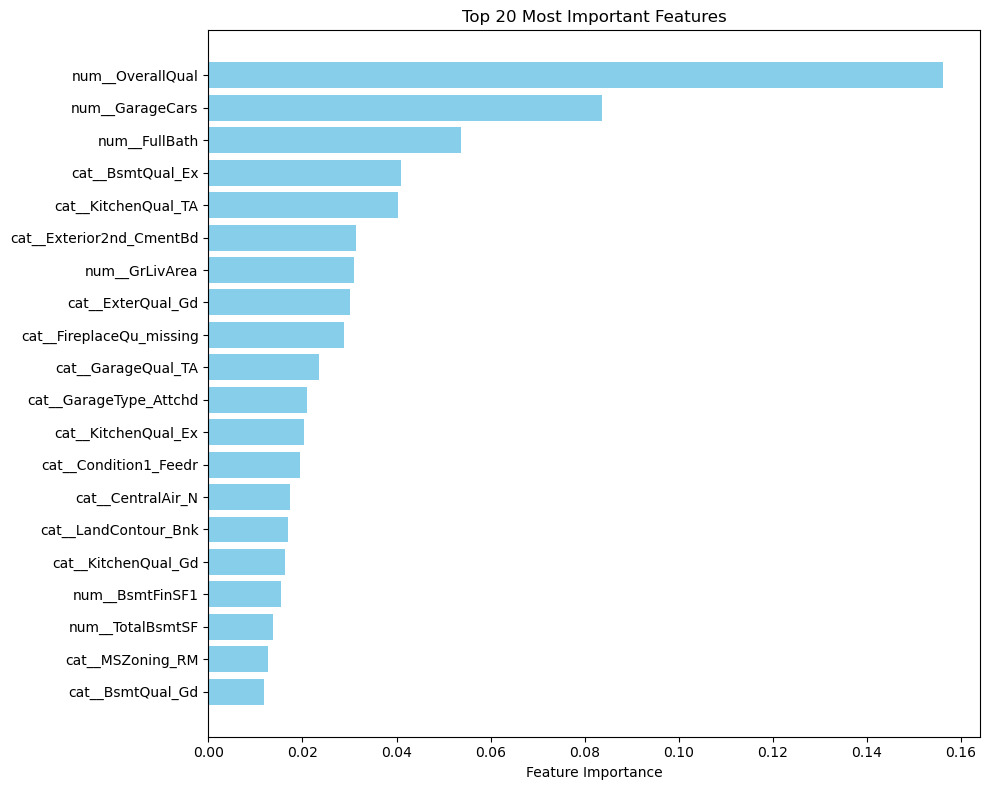

In [120]:
top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(feat_imp["Feature"][:top_n][::-1], feat_imp["Importance"][:top_n][::-1], color="skyblue")
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Most Important Features")
plt.tight_layout()
plt.show()

In [124]:
dftest=pd.read_csv("data/test.csv")
dftest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [125]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [126]:
dftestpreds=Xmodel.predict(dftest)

In [128]:
dftestpreds[:100]

array([126393.13 , 149999.67 , 178205.33 , 191411.3  , 210983.   ,
       177807.86 , 179698.42 , 174124.64 , 177834.67 , 113944.11 ,
       192458.28 ,  96688.125, 118515.836, 152822.23 , 140753.27 ,
       358446.44 , 250945.95 , 307615.1  , 283672.28 , 440808.47 ,
       322082.97 , 201743.3  , 173307.48 , 177904.2  , 181390.86 ,
       202622.83 , 381410.66 , 221194.61 , 209658.5  , 211551.97 ,
       184335.88 ,  89789.89 , 176163.05 , 293563.8  , 289730.94 ,
       216650.88 , 172733.1  , 157635.39 , 154593.17 , 148829.3  ,
       175246.16 , 151705.4  , 326241.8  , 202382.11 , 218179.58 ,
       192973.52 , 232858.12 , 202459.23 , 161304.39 , 143041.38 ,
       140956.44 , 169509.3  , 156928.98 , 174406.98 , 164595.78 ,
       164451.27 , 160384.5  , 118072.516, 204529.47 , 132071.56 ,
       137664.17 , 166199.86 , 105198.38 , 121375.91 , 113832.06 ,
       133890.19 , 107513.914, 127153.65 , 145134.78 , 169554.27 ,
       126570.83 ,  91919.266, 140571.4  , 121371.12 , 162841.

In [139]:
submission = pd.DataFrame({
    "Id": dftest["Id"],
    "SalePrice": preds
})

# Save to CSV
submission.to_csv("submission1.csv", index=False)

In [140]:
preds=grid_model.predict(dftest)

array([125976.41 , 158882.16 , 180735.66 , ..., 175666.19 , 126049.766,
       214709.38 ], shape=(1459,), dtype=float32)

In [142]:
submission1 = pd.DataFrame({
    "Id": dftest["Id"],
    "SalePrice": preds
})

# Save to CSV
submission1.to_csv("submission1.csv", index=False)